In [2]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 3.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.8 MB 5.6 MB/s eta 0:00:02
   -------------------------- ------------- 6.6/9.8 MB 10.1 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

Model Evaluation:
Mean Squared Error (MSE): 12.07
R-squared Score: 0.97


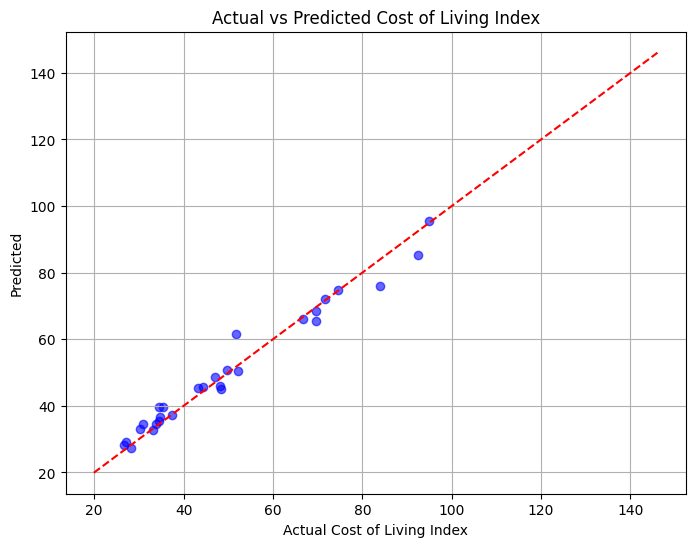


Feature Coefficients:
                              Coefficient
Rent Index                       0.037021
Groceries Index                  0.564300
Restaurant Price Index           0.346336
Local Purchasing Power Index     0.012680


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load dataset
df = pd.read_csv('Cost_of_Living_Index_2022.csv')

# Check for nulls
print(df.isnull().sum())

# Drop rows with missing values (or you can fillna if needed)
df = df.dropna()

# Select features and target
features = ['Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']
target = 'Cost of Living Index'

X = df[features]
y = df[target]

# Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Show predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Cost of Living Index")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Cost of Living Index")
plt.grid(True)
plt.show()

# Show feature coefficients
coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coeff_df)


In [3]:
joblib.dump(model, 'model.pkl')

['model.pkl']